In [223]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
with open('АмплитудаКалибровка.txt', 'r') as file:
    dataset_raw = file.read()

In [225]:
dataset_raw = dataset_raw.split('\n')
# разбиваем на волны

In [226]:
dataset_raw = [
    number.replace(',', '.').split('\t') for number in dataset_raw
][:-1]
# заменяем все запятые на точки, чтобы потом перевести в float
# разделяем по tab, т.к. это разные значения
# [:-1] -- удаляем последний элемент

In [227]:
dataset = []
for wave_i, wave in enumerate(dataset_raw):
#     enumerate каждую итерацию возвращает два числа: счетчик и значение
#     wave_i = 0; wave = [60.5, ..., 70.4]
    dataset.append([]) # создаем новую волну
    for value in wave: # проходим по каждой амплитуде
        dataset[wave_i].append(float(value))
#         для каждой волны добавляем ее амплитуду, но уже в float

In [228]:
clusters = [[i] for i in range(len(dataset))]
# массив, в котором будет записываться слияние волн

In [234]:
def average(x: float, y: float):
#     среднее арифметическое
    return (x + y) / 2

def pirson_coef(waves: list):
#     коэффицент Пирсона
    return np.corrcoef(waves)

def new_wave(w1: list, w2: list):
#     возвращает новую волну, которая создается путем
#     получения среднего значения между каждым элементом двух данных
#     x1 = [1, 2, 3]
#     x2 = [6, 7, 8]
#     new_wave = [3.5, 4.5, 5.5]

    wave = []  # новая волна
    for value in range(len(w1)):
#         проходим по каждой амплитуде каждой волны
        wave.append(average(w1[value], w2[value]))
#         в новую волну записываем среднее значение
#         каждой из амплитуд 2 предыдуших волн
    
    return wave

def new_waves(ds: list, biggest: tuple):
#     возвращает новых список волн, длинна которого на 1 меньше,
#     т.к. два наибольших совпадения сливаются в одну волну в
#     функции new_wave()
    
    new = []  # новые волны
    for line in range(len(ds)):  # все элементы текущих волн
        if line != biggest[0] and line != biggest[1]:
#             если волна текущей итерации не наибольшее совпадение
            new.append(ds[line])
    
    new.append(
        new_wave(ds[biggest[0]], ds[biggest[1]])
    )  # добавляем только что созданную волну
    
    return new
    
def get_biggest_match(pirson):
#     возвращает tuple, описанный ниже
#     пример -- (0.999944393, 21, 22)
    
    biggest_match = 0, None, None
#     первое значение -- коэффицент, насколько сопадают волны
#     второе -- первая волна, с наибольшим совпадением
#     третье -- вторая волна, с наибольшим совпадением
    for wave_i, wave in enumerate(pirson):
#         проходим по массиву с коэффицентами
        for coef_i, coef in enumerate(wave):
#             проходим по всем коэффицентам
            if wave_i != coef_i:
#                 исключаем диагональ, т.к. значение всегда 1
                if biggest_match[0] < coef:
#                     если текущее совпадение больше старого максимума
                    biggest_match = coef, wave_i, coef_i

    return biggest_match

def new_cluster(cl, waves):
#     возвращает новый массив clusters, который показывает
#     какой кластер включает в себя какие волны
#     пример -- [[1, 3], [2]]
    
    for wave in cl[waves[1]]:
#         добавляем все значения второго кластера в первый
        cl[waves[0]].append(wave)
    del cl[waves[1]]  # удаляем второй
    
    return cl

In [230]:
def output(ds, cl, cluster_len):
#     каждую итерацию количество волн и кластеров
#     будет становиться меньше на 1, т.к.
#     мы соединяем вместе два наибольших совпадения
    
    pirson = pirson_coef(ds)
#     каждый раз заново считаем коэффицент Пирсона
    result = get_biggest_match(pirson)
#     находим наибольшее совпадение
    cl = new_cluster(cl, (result[1], result[2]))
#     обновляем кластеры
    ds = new_waves(ds, (result[1], result[2]))
#     обновляем волны
    
    if len(ds) == cluster_len:
        return ds, cl
#         возвращаем итоговые волны и кластеры
    
    return output(ds, cl, cluster_len)  # есл

In [231]:
final_w, final_c = output(dataset, clusters, 4)
# получаем итоговые волны и кластеры

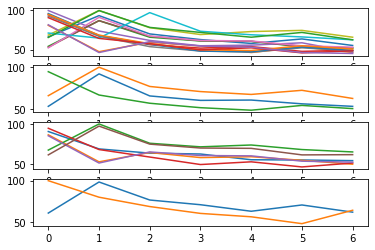

In [233]:
for plot_i, plot in enumerate(final_c):
    plt.subplot(len(final_c), 1, plot_i + 1)
#     создаем один "подграфик"
#     первым аргументом указываем, что их будет всего 4
#     последним, какой сейчас
    for value in plot:
#         добавляем туда значение, который всего 7,
#         из-за этого такой массив первый аргументом,
#         и значения амплитуд для отображения
        plt.plot([i for i in range(7)], dataset[value])

plt.show()  # выводим